In [71]:
import requests 
from bs4 import BeautifulSoup #library used for web scrapping
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

def text_extraction(url, output_file):
    response = requests.get(url, verify = False)
    soup = BeautifulSoup(response.text, 'html.parser') 
   
    
    text_elements = soup.find_all('body') #extract content of body of the script
    extracted_text = "\n".join([element.get_text() for element in text_elements])

    # Save the extracted text to a text file for further processing
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(extracted_text)

    print(f"Text extracted from {url} and saved to {output_file}")

In [72]:
url = 'https://www.edx.org/course/data-science-machine-learning' 
doc1_output = 'doc1.txt'  
text_extraction(url, doc1_output)

Text extracted from https://www.edx.org/course/data-science-machine-learning and saved to doc1.txt


In [73]:
url = 'https://en.wikipedia.org/wiki/Engineering'  
doc2_output = 'doc2.txt'  # Choose a filename for the output file
text_extraction(url, doc2_output)

Text extracted from https://en.wikipedia.org/wiki/Engineering and saved to doc2.txt


In [74]:
url = 'http://my.clevelandclinic.org/research'  
doc3_output = 'doc3.txt'  # naming for the output file
text_extraction(url, doc3_output)

Text extracted from http://my.clevelandclinic.org/research and saved to doc3.txt


In [75]:
url = 'https://en.wikipedia.org/wiki/Data_mining' 
doc4_output = 'doc4.txt'  # Choose a filename for the output file
text_extraction(url, doc4_output)

Text extracted from https://en.wikipedia.org/wiki/Data_mining and saved to doc4.txt


In [76]:
url = 'https://en.wikipedia.org/wiki/Data_mining#Data_mining'  
doc5_output = 'doc5.txt'  # Choose a filename for the output file
text_extraction(url, doc5_output)

Text extracted from https://en.wikipedia.org/wiki/Data_mining#Data_mining and saved to doc5.txt


In [77]:
url = 'https://eecs.csuohio.edu/~sschung/'
doc6_output = 'doc6.txt'  # Choose a filename for the output file
text_extraction(url, doc6_output)

Text extracted from https://eecs.csuohio.edu/~sschung/ and saved to doc6.txt


In [78]:
### Import necessary Libaries

In [79]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')  # Download the stop words data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/temitopeadeniyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
# Function to process the text as per the sequence
def process_text(text):
    # 1. Remove punctuation and symbols
    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuation = text.translate(translator)
    text_without_symbols = re.sub(r'[^a-zA-Z0-9\s]', '', text_without_punctuation)
    
    # 2. Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text_without_symbols.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # 3. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # 4. Lowercasing
    cleaned_lower_text = ' '.join(lemmatized_words).lower()
    
    return cleaned_lower_text

In [81]:
#### Input and output file names
input_file = "doc1_output.txt"
# Read the input file
with open(input_file, "r") as f:
    data = f.read()

# Remove punctuation and symbols
doc1 = process_text(data)

#print(doc1)

In [82]:
#### Input and output file names
input_file = "doc2_output.txt"
# Read the input file
with open(input_file, "r") as f:
    data = f.read()

# Remove punctuation and symbols
doc2 = process_text(data)

#print(doc2)

In [83]:
#### Input and output file names
input_file = "doc3_output.txt"
# Read the input file
with open(input_file, "r") as f:
    data = f.read()

# Remove punctuation and symbols
doc3 = process_text(data)

#print(doc3)

In [84]:
#### Input and output file names
input_file = "doc4_output.txt"
# Read the input file
with open(input_file, "r") as f:
    data = f.read()

# Remove punctuation and symbols
doc4 = process_text(data)

#print(doc4)

In [85]:
#### Input and output file names
input_file = "doc5_output.txt"
# Read the input file
with open(input_file, "r") as f:
    data = f.read()

# Remove punctuation and symbols
doc5 = process_text(data)

#print(doc5)

In [86]:
#### Input and output file names
input_file = "doc6_output.txt"
# Read the input file
with open(input_file, "r") as f:
    data = f.read()

# Remove punctuation and symbols
doc6 = process_text(data)

#print(doc6)

In [87]:
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from nltk import bigrams, trigrams

nltk.download('punkt')  # Download NLTK data (if you haven't already)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/temitopeadeniyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
def count_terms(documents):
    # Define the keywords and bi-grams to count
    keywords = ["research", "data", "mining", "analytics"] #one gram keywords
    bi_grams = ["data mining", "machine learning", "deep learning"] #bi gram keywords
    
    #creating DataFrame to store the results of the terms counted
    Term_freq_df = pd.DataFrame(columns=["Document"] + keywords + bi_grams)
    
    # create dictionary to keep track of document frequency
    doc_frequency = {term: 0 for term in keywords + bi_grams}
    
    for i, doc in enumerate(documents, start=1):
        # Tokenize the text using word_tokenize
        tokens = word_tokenize(doc.lower())  # Convert to lowercase for case-insensitivity

        # Initialize counts of the terms
        keyword_counts = {}
        bi_gram_counts = {}    
        keyword_counts["Document"] = f"Doc {i}"

        # Count all the one-gram keywords and update document frequency
        for keyword in keywords:
            keyword_counts[keyword] = tokens.count(keyword)
            if tokens.count(keyword) > 0:
                doc_frequency[keyword] += 1

        # Count all the bi-grams and update document frequency
        for bi_gram in bi_grams:
            bi_gram_tokens = tuple(bi_gram.split())
            bi_gram_counts[bi_gram] = list(bigrams(tokens)).count(bi_gram_tokens)
            if list(bigrams(tokens)).count(bi_gram_tokens) > 0:
                doc_frequency[bi_gram] += 1

        # Append the counts to the DataFrame
        Term_freq_df = Term_freq_df.append({**keyword_counts, **bi_gram_counts}, ignore_index=True)

    # Create a DataFrame from the doc_frequency dictionary
    doc_freq_df = pd.DataFrame.from_dict(doc_frequency, orient='index', columns=['Document Frequency'])
    doc_freq_df.reset_index(inplace=True)
    doc_freq_df.columns = ['Term', 'Document Frequency']

    return Term_freq_df, doc_freq_df

In [137]:
# Put your documents into a list
documents = [doc1, doc2, doc3, doc4, doc5, doc6]

# Count keywords and bigrams for the documents
Term_freq, doc_freq = count_terms(documents)


In [138]:
print("--------Term Frequency all documents:-------")
Term_freq

--------Term Frequency all documents:-------


,Document,research,data,mining,analytics,data mining,machine learning,deep learning
0,Doc 1,7,24,0,1,0,13,0
1,Doc 2,18,3,8,0,0,0,0
2,Doc 3,38,1,0,0,0,0,2
3,Doc 4,10,246,155,6,127,24,1
4,Doc 5,10,246,155,6,127,24,1
5,Doc 6,33,72,3,22,2,24,6


In [92]:
print("--------Document frequency:-------")
doc_freq

--------Document frequency:-------


,Term,Document Frequency
0,research,6
1,data,6
2,mining,4
3,analytics,4
4,data mining,3
5,machine learning,4
6,deep learning,4


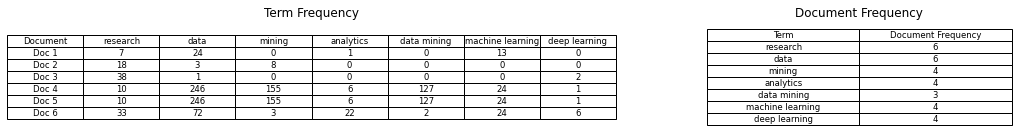

In [34]:
import matplotlib.pyplot as plt

# Create subplots with varying widths
fig, axs = plt.subplots(1, 2, figsize=(18, 2), gridspec_kw={'width_ratios': [2, 1]})

# Set the font size
font_size = 8.5

axs[0].set_title('Term Frequency')
axs[0].axis('tight')
axs[0].axis('off')
table1 = axs[0].table(cellText=Term_freq.values, colLabels=Term_freq.columns, cellLoc='center', loc='center', fontsize=font_size)

axs[1].set_title('Document Frequency')
axs[1].axis('tight')
axs[1].axis('off')
table2 = axs[1].table(cellText=doc_freq.values, colLabels=doc_freq.columns, cellLoc='center', loc='center', fontsize=font_size)

# Adjust the table layout
table1.auto_set_font_size(False)
table1.set_fontsize(font_size)
table2.auto_set_font_size(False)
table2.set_fontsize(font_size)

plt.show()


# EXTRA CREDIT

In [105]:
import pandas as pd
from nltk import word_tokenize, bigrams

def Dictionary_file(documents):
    keywords = ["research", "data", "mining", "analytics"] #one gram keywordss
    bi_grams = ["data mining", "machine learning", "deep learning"] #bi gram
    # Initialize DataFrame to store the results
    results = pd.DataFrame(columns=["Term", "Doc #", "Freq"])
    
    for i, doc in enumerate(documents, start=1):
        # Tokenize the text
        tokens = word_tokenize(doc.lower())  # Convert to lowercase for case-insensitivity

        # Count one-gram keywords
        for keyword in keywords:
            frequency = tokens.count(keyword)
            if frequency > 0:  # Check if frequency is greater than zero
                results = results.append({"Term": keyword, "Doc #": f"{i}", "Freq": frequency}, ignore_index=True)

        # Count bi-grams
        for bi_gram in bi_grams:
            bi_gram_tokens = tuple(bi_gram.split())
            frequency = list(bigrams(tokens)).count(bi_gram_tokens)
            if frequency > 0:  # Check if frequency is greater than zero
                results = results.append({"Term": bi_gram, "Doc #": f" {i}", "Freq": frequency}, ignore_index=True)

    return results

# Put your documents into a list
documents = [doc1, doc2, doc3, doc4, doc5, doc6]

# Count keywords and bigrams for the documents
Dictionary_file = Dictionary_file(documents)

# Display the results
Dictionary_file


,Term,Doc #,Freq
0,research,1,7
1,data,1,24
2,analytics,1,1
3,machine learning,1,13
4,research,2,18
5,data,2,3
6,mining,2,8
7,research,3,38
8,data,3,1
9,deep learning,3,2


In [104]:
# Generate the L3InvertedIndex
def find_InvertedIndex(results):
    term_doc_count = results.groupby('Term')['Doc #'].nunique().reset_index()
    term_total_freq = results.groupby('Term')['Freq'].sum().reset_index()
    InvertedIndex = term_doc_count.merge(term_total_freq, on='Term')
    InvertedIndex.columns = ['Term', 'Doc #', 'Total Frequency']
    return InvertedIndex

InvertedIndex = find_InvertedIndex(Dictionary_file)


print("--------Inverted Index:-------")
InvertedIndex

--------Inverted Index:-------


,Term,Doc #,Total Frequency
0,analytics,4,35
1,data,6,592
2,data mining,3,256
3,deep learning,4,10
4,machine learning,4,85
5,mining,4,321
6,research,6,116


## Calculate the idf

### idf = log*10* (N/df)

N = total number of documnet =6

df = document frequency for each term

In [141]:
N = 6

# Calculate the IDF for each term and add it to the DataFrame
InvertedIndex["IDF"] = np.log(N/InvertedIndex["Doc #"])

print("--------Inverted Index - idf value:-------")
# Display the updated InvertedIndex DataFrame
InvertedIndex

--------Inverted Index - idf value:-------


,Term,Doc #,Total Frequency,IDF
0,analytics,4,35,0.405465
1,data,6,592,0.000000
2,data mining,3,256,0.693147
3,deep learning,4,10,0.405465
4,machine learning,4,85,0.405465
5,mining,4,321,0.405465
6,research,6,116,0.000000


In [300]:
InvertedIndex["IDF"]

0    0.405465
1    0.000000
2    0.693147
3    0.405465
4    0.405465
5    0.405465
6    0.000000
Name: IDF, dtype: float64

The tf-idf weight of a term is the product of its tf weight and its idf weight

## W = log(1 + tf) * log10(N/df)

In [157]:
columns_to_convert = ['research', 'data', 'mining', 'analytics', 'data mining', 'machine learning', 'deep learning']

# Convert the specified columns to numeric
Term_freq[columns_to_convert] = Term_freq[columns_to_convert].apply(pd.to_numeric)
InvertedIndex["IDF"] = pd.to_numeric(InvertedIndex["IDF"])


In [159]:
# Define a function to calculate TF-IDF
def calculate_tfidf(tf, idf):
    return np.log(1 + tf) * idf

# Create a new DataFrame to store the TF-IDF values
tfidf_df = pd.DataFrame()

# Calculate TF-IDF for each term and document
for term in InvertedIndex["Term"]:
    tfidf_df[term] = calculate_tfidf(Term_freq[term], InvertedIndex.loc[InvertedIndex["Term"] == term, "IDF"].values[0])

# Display the TF-IDF DataFrame
tfidf_df

,analytics,data,data mining,deep learning,machine learning,mining,research
0,0.281047,0.0,0.000000,0.000000,1.070046,0.000000,0.0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.890898,0.0
2,0.000000,0.0,0.000000,0.445449,0.000000,0.000000,0.0
3,0.788999,0.0,3.363171,0.281047,1.305142,2.047540,0.0
4,0.788999,0.0,3.363171,0.281047,1.305142,2.047540,0.0
5,1.271334,0.0,0.761500,0.788999,1.305142,0.562094,0.0


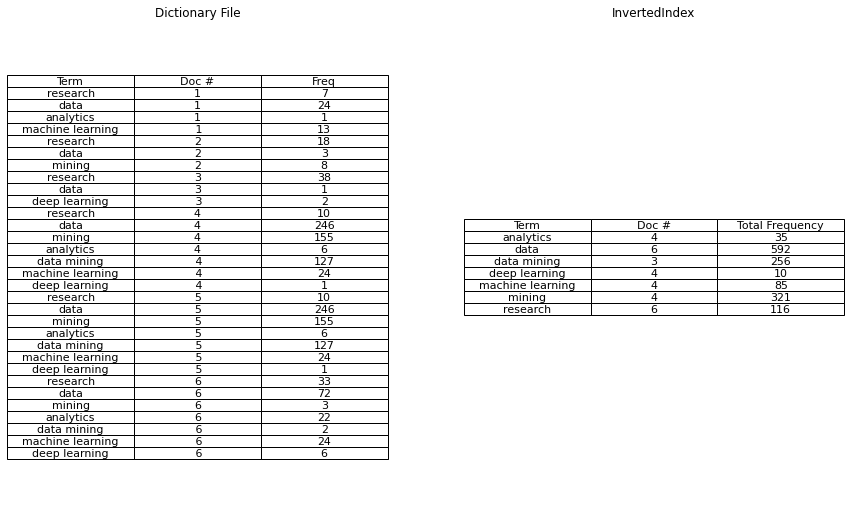

In [125]:
import matplotlib.pyplot as plt
font_size = 11
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

# Plot df1 in the first subplot
axs[0].set_title("Dictionary File")
axs[0].axis('tight')
axs[0].axis('off')
table1 = axs[0].table(cellText=Dictionary_file.values, colLabels=Dictionary_file.columns, cellLoc='center', loc='center')

# Plot df2 in the second subplot
axs[1].set_title("InvertedIndex")
axs[1].axis('tight')
axs[1].axis('off')
table2 = axs[1].table(cellText=InvertedIndex.values, colLabels=InvertedIndex.columns, cellLoc='center', loc='center')
# Adjust the table layout

table1.auto_set_font_size(False)
table1.set_fontsize(font_size)
table2.auto_set_font_size(False)
table2.set_fontsize(font_size)
plt.show()

## Part 2

In [134]:
def cosine_similarity(d1, d2):
    dot_product = np.dot(d1, d2)
    norm_d1 = np.linalg.norm(d1)
    norm_d2 = np.linalg.norm(d2)

    similarity = dot_product / (norm_d1 * norm_d2)
    return similarity

term_freq = Term_freq.set_index('Document')

In [135]:

# Calculate cosine similarity between all pairs of rows
cosine_sim = np.zeros((len(term_freq), len(term_freq)))

for i in range(len(df)):
    for j in range(len(df)):
        cosine_sim[i, j] = cosine_similarity(term_freq.iloc[i], term_freq.iloc[j])

# Create a DataFrame from the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=term_freq.index, columns=term_freq.index)
print("--------------Cosine Similarity Matrix for all documents----------------")
# Display the cosine similarity DataFrame
cosine_sim_df

--------------Cosine Similarity Matrix for all documents----------------


Document,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6
Document,,,,,,
Doc 1,1.000000,0.352441,0.270197,0.700846,0.700846,0.946528
Doc 2,0.352441,1.000000,0.905790,0.340152,0.340152,0.487174
Doc 3,0.270197,0.905790,1.000000,0.051813,0.051813,0.409105
Doc 4,0.700846,0.340152,0.051813,1.000000,1.000000,0.711882
Doc 5,0.700846,0.340152,0.051813,1.000000,1.000000,0.711882
Doc 6,0.946528,0.487174,0.409105,0.711882,0.711882,1.000000


## Part 3